<a href="https://colab.research.google.com/github/w2k31984/clasificacion_con_modelos_de_ML/blob/master/Clasificacion_con_ML_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [157]:
#Importar librerias
import pandas as pd
import plotly.express as px #Para realizar graficos interactivos.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings #Ignorar los warning que se produzcan en el proyecto.
warnings.filterwarnings('ignore')
print('Librerias cargadas con exito!')

Librerias cargadas con exito!


In [158]:
#Cargando nuestro archivo de datos desde drive.
datos =pd.read_csv('/content/drive/MyDrive/Data_Science/Clasificacion_Datos_ML/marketing_inversiones.csv')

In [159]:
#Visualizando los datos de nuestro DF
datos.head()

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [160]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

* Variables categoricas: Son aquellas que establecen una categoria o clase.
* Variables numericas: Son aquellas que representan un numero o cantidad.<br>
Para esto se utiliza un histograma de frecuencia para entender como estan distribuidos mis datos.

In [161]:
#Creacion del histograma
px.histogram(datos, x= 'adherencia_inversion', text_auto= True, title= 'Adherencia a inversiones')


In [162]:
#Histograma del estado civil vrs. la Adherencia a inversiones.
px.histogram(datos, x= 'estado_civil', text_auto= True, title= 'Estado civil vrs. Adherencia a inversiones', color= 'adherencia_inversion', barmode= 'group')

In [163]:
#Histograma de la relacion entre la escolaridad vrs. la Adherencia a inversiones.
px.histogram(datos, x= 'escolaridad', text_auto= True, title= 'Escolaridad vrs. Adherencia a inversiones', color= 'adherencia_inversion', barmode= 'group')

In [164]:
#Histograma de la relacion entre si es default vrs. la Adherencia a inversiones.
px.histogram(datos, x= 'default', text_auto= True, title= 'Default vrs. Adherencia a inversiones', color= 'adherencia_inversion', barmode= 'group')

In [165]:
#Histograma de la relacion entre si es prestatario vrs. la Adherencia a inversiones.
px.histogram(datos, x= 'prestatario', text_auto= True, title= 'Prestatario vrs. Adherencia a inversiones', color= 'adherencia_inversion', barmode= 'group')

### Variables numéricas

In [166]:
#Comparacion de las variable numerica de edad.
px.box(datos, x= 'edad', color= 'adherencia_inversion', title= 'Edad vrs. Adherencia a inversiones')

In [167]:
#Comparacion de las variable numerica de saldo.
px.box(datos, x= 'saldo', color= 'adherencia_inversion', title= 'Saldo vrs. Adherencia a inversiones')

In [168]:
#Comparacion de la variable numerica ultimo contacto.
px.box(datos, x= 'ultimo_contacto', color= 'adherencia_inversion', title= 'Saldo vrs. Adherencia a inversiones')

In [169]:
##Comparacion de la variable numerica Cantidad de contacto.
px.box(datos, x= 'ct_contactos', color= 'adherencia_inversion', title= 'Saldo vrs. Adherencia a inversiones')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [170]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


In [171]:
#Separando las variables explicativas y la variable resultado(adherencia_inversion)
X = datos.drop('adherencia_inversion', axis= 1)
y = datos['adherencia_inversion']
print('Variables explicativas: \n', X.head())
print('\nVariable resultado: \n', y.head())

Variables explicativas: 
    edad    estado_civil escolaridad default  saldo prestatario  \
0    45      casado (a)    superior      no    242          no   
1    42      casado (a)  secundaria      no   1289          no   
2    23     soltero (a)    superior      no    363          no   
3    58  divorciado (a)    superior      no   1382          no   
4    50      casado (a)  secundaria      no   3357          no   

   ultimo_contacto  ct_contactos  
0              587             1  
1              250             4  
2               16            18  
3              700             1  
4              239             4  

Variable resultado: 
 0    si
1    si
2    no
3    si
4    si
Name: adherencia_inversion, dtype: object


In [172]:
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


In [173]:
y

,adherencia_inversion
0,si
1,si
2,no
3,si
4,si
...,...
1263,si
1264,si
1265,si
1266,si


## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

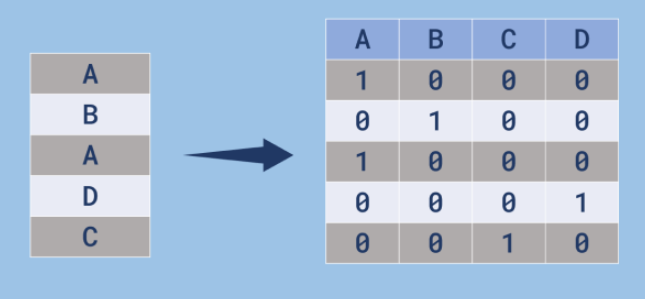

In [174]:
#Transformando nuestras variables explicativas en variables numericas para nuestro modelo de ML.
from sklearn.compose import make_column_transformer #Genera un transformador de columnas.
from sklearn.preprocessing import OneHotEncoder #Componer de como queremos la transformacion de nuestros datos.

In [175]:
columnas = X.columns

In [176]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridad', 'default', 'prestatario']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [177]:
X = one_hot.fit_transform(X)

In [178]:
#Viendo el resultado de como quedo el nombre de las issues
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

In [179]:
#Como queda nuestra variable explicativa X
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

In [180]:
#Ver el contenido de mis variables explicativas con los valores asignados.
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
label_encoder= LabelEncoder()

In [183]:
#Convirtiendo los SI en 1 y los NO en 0 de nuestra variable Y
y = label_encoder.fit_transform(y)

In [184]:
y

array([1, 1, 0, ..., 1, 1, 1])

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [185]:
#Importando nuestra libreria que separa nuestros datos de entrenamiento y de prueba.
from sklearn.model_selection import train_test_split
print('Libreria importada')

Libreria importada


In [186]:
#Separando nuestros arrays entre datos de entrenamiento y de prueba, tanto de las variables explicativas como de variable de respuesta.
#Esto lo haremos separando base de entrenamiento y base de pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=5)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [187]:
from sklearn.dummy import DummyClassifier
print('Libreria importada')

Libreria importada


In [188]:
dummy= DummyClassifier()
dummy.fit(X_train, y_train)

#Viendo el desempeño del modelo o exactitud del modelo.
dummy.score(X_test, y_test)

0.6025236593059937

**Explicacion**<br>
Esto nos indica que 60% de las veces este modelo clasifico correctamente.
Lo que es algo que a principio parece bien, aunque para este caso no porque esta asignado los casos a la variable o clase  con mayor frecuencia o sea **NO.** <br>

**Conclusion**
Debemos generar mas modelos de ML que nos ayuden a conocer si los clientes van a asociarse al programa de inversiones o NO.

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [189]:
from sklearn.tree import DecisionTreeClassifier
print('Libreria importada')

Libreria importada


In [190]:
#Creando nuestro modelo de arbol de decision.
modelo_arbol= DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [191]:
#Verificando como generalizo nuestro modelo de arbol de decision.
modelo_arbol.score(X_test, y_test)

0.6656151419558359

**Explicacion**<br>
Esto nos indica que 66% de las veces este modelo clasifico correctamente.
Lo que es algo que a principio parece bien, aunque para este caso no porque no mejoro mucho respecto al 60% de nuestro modelo base de referencia.

In [192]:
#Visualizando que esta haciendo nuestro arbol de decision los arboles de decision no son caja negra pues este permite visualizarlo.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
print('Librerias importadas')

Librerias importadas


```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

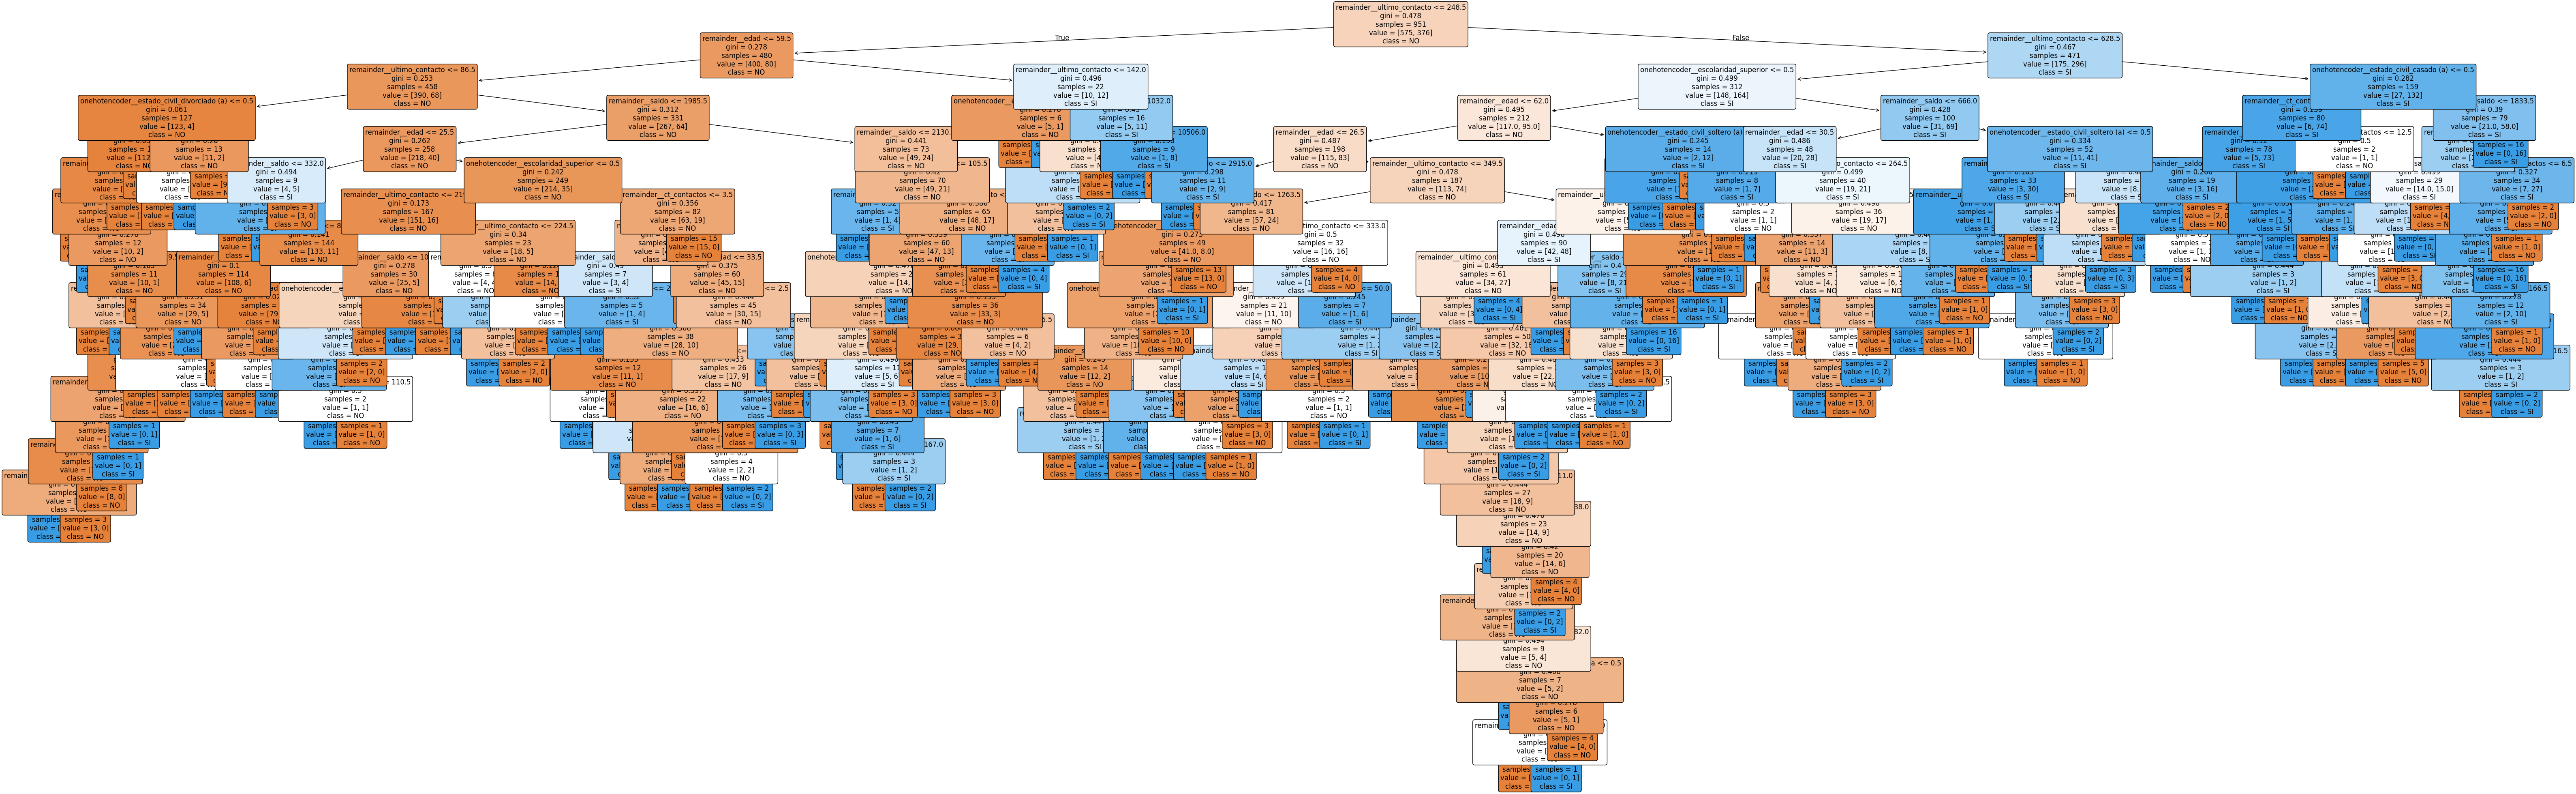

In [193]:
#Generando nuestro grafico
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, feature_names=one_hot.get_feature_names_out(columnas), filled=True, rounded=True, class_names=['NO', 'SI'], fontsize=12);


In [194]:
modelo_arbol.score(X_train, y_train)

1.0

**Explicacion**<br>
Esto nos indica que llego a un 100% de las veces este modelo clasifico correctamente. Lo que significa que evaluo y aprendio cada una de las observaciones siempre que llego a cero en el algoritmo de GINNI.



In [195]:
#Recreando nuestro modelo de arbol con un parametro adicional max deep o profundidad maxima.
modelo_arbol_2= DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol_2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=5)

In [196]:
#Haciendo el score.
modelo_arbol_2.score(X_test, y_test)

0.7160883280757098

**Explicacion**<br>
Esto nos indica que llego a un 71% de las veces este modelo clasifico correctamente. Lo que significa que evaluo y aprendio cada una de las observaciones siempre que llego a cero en el algoritmo de GINNI esto mejoro respecto al 66% de nuestro primer modelo y que tenemos un modelo adaptado y no sobre ajustado que significa que los datos futuros no los va a predecir de mejor forma porque se memorizo completamente todas las observaciones y no estaria en condicion de recibir condiciones nuevas.

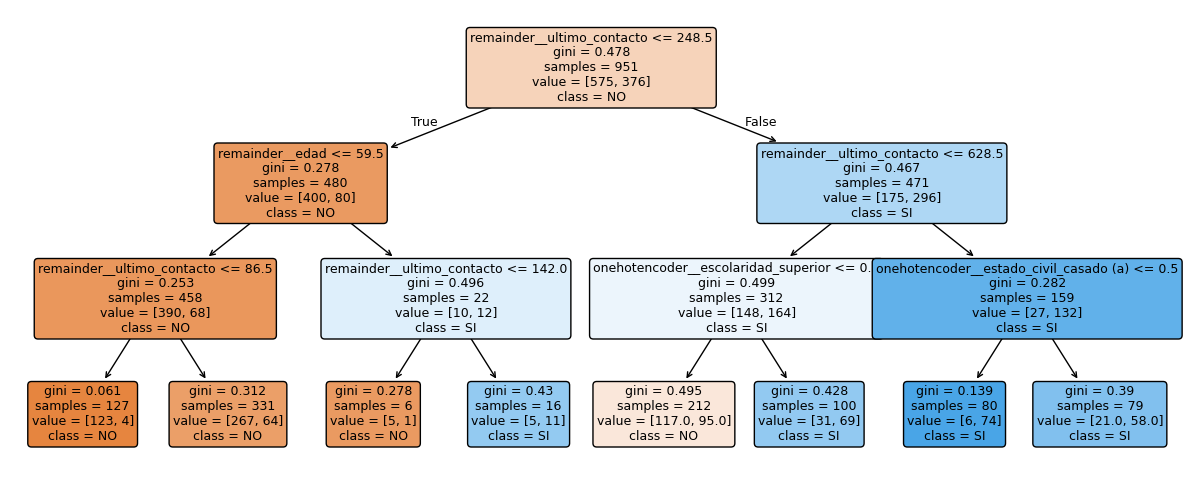

In [197]:
#Graficando nuestro modelo de arbol de decision.
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol_2, feature_names=one_hot.get_feature_names_out(columnas), filled=True, rounded=True, class_names=['NO', 'SI'], fontsize=9);

In [198]:
#Generando nuestro modelo con el dataset de entrenamiento
modelo_arbol_2.score(X_train, y_train)

0.7613038906414301

**Explicacion <br>**
Esto nos indica que llego a un 76% de las veces este modelo clasifico correctamente. con los datos de entrenamiento. Lo que significa que evaluo y aprendio cada una de las observaciones siempre que llego a cero en el algoritmo de GINNI esto mejoro respecto al 71% que generalizo con los datos de test de nuestro modelo, esto sin ningun tipo de parametrizacion de nuestros modelos.

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [199]:
from sklearn.preprocessing import MinMaxScaler
print('Libreria importada')

Libreria importada


In [200]:
#normalizando nuestro dataset de entrenamiento con sus clases
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [201]:
#Creando dataframe con los datos normalizados que quedan en 0 y 1, ninguna tiene mas relevancia que la otra por tanto todas seran medidas con la misma regla.
pd.DataFrame(X_train_normalizado, columns=one_hot.get_feature_names_out(columnas))


,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.
El punto de consulta seria nuestra variable de consulta, y medira las clases mas cercanas a este punto de consulta y clasificarlo.

In [202]:
from sklearn.neighbors import KNeighborsClassifier
print('Libreria importada')

Libreria importada


In [203]:
#Llamando nuestro clasificador
knn= KNeighborsClassifier()

In [204]:
#Haciendo el fit de nuestras variables de entrenamiento tanto X como y.
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [205]:
#Se realiza la transformacion de X_test normalizado.
X_test_normalizado = normalizacion.transform(X_test)

In [206]:
#Realizando nuestro knn score para X_test y y_test
knn.score(X_test_normalizado, y_test)

0.6876971608832808

**Explicacion <br>**
Esto nos indica que llego a un 68% de las veces este modelo clasifico correctamente. con los datos de test generalizando.

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [207]:
#Creamos una lista de tuplas con los modelos de ML que hemos desarrollado.
lista =[('dummy', dummy, X_test), ('arbol', modelo_arbol,X_test), ('knn',knn,X_test_normalizado),]
for i in lista:
  print(f'La exactitud de modelo {i[0]}: tiene un score de {i[1].score(i[2], y_test)}')

La exactitud de modelo dummy: tiene un score de 0.6025236593059937
La exactitud de modelo arbol: tiene un score de 0.6656151419558359
La exactitud de modelo knn: tiene un score de 0.6876971608832808


**Explicacion <br>**
Podemos visualizar que el **modelo de arbol** obtuvo el mejor puntaje en este caso particular por su mejor desempeño con un **66%** de clasificacion de las clases en nuestra data de test.

In [208]:
#Importando nuestro modelo con pickle la cual hace nuestro modelo de tipo archivo binario.
import pickle
print('Libreria importada')

Libreria importada


In [209]:
#Conteniendo nuestro modelo como archivo binario para su consumo wb= write binary.
with open('modelo_onehotencoder.pkl', 'wb') as archivo:
  pickle.dump(one_hot, archivo)

In [210]:
#Conteniendo nuestro modelo de arbol como archivo generalmente cuando esta en produccion un modelo es el champion.
with open('modelo_champion.pkl', 'wb') as archivo:
  pickle.dump(modelo_arbol, archivo)

In [211]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [212]:
#Creando un nuevo dato con los datos.
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [213]:
#Creando un pandas df con el nuevo dato.
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,soltero (a),superior,no,23040,no,800,4


In [219]:
#Trayendo nuestro modelos.
modelo_one_hot= pd.read_pickle('/content/drive/MyDrive/Data_Science/Clasificacion_Datos_ML/modelos_ML/modelo_onehotencoder.pkl')
modelo_arbol= pd.read_pickle('/content/drive/MyDrive/Data_Science/Clasificacion_Datos_ML/modelos_ML/modelo_champion.pkl')

In [220]:
#Codificamos nuestro nuevo_dato para luego aplicar nuestro modelo champion
nuevo_dato_transformado = one_hot.transform(nuevo_dato)
nuevo_dato_transformado

array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 4.500e+01, 2.304e+04, 8.000e+02, 4.000e+00]])

In [221]:
#Creando predicciones con nuestros modelos al nuevo dato.
modelo_arbol.predict(nuevo_dato_transformado)

array([1])

**Explicacion <br>**
Esto explica que **nuestro cliente puede tener hasta un 70% de probabilidad de ingresar o adherirse SI a el plan de inversiones.**